In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [10]:
company = 'AMC'

start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = web.DataReader(company, 'yahoo', start, end)

# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

In [11]:
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])


x_train, y_train  = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
# Build Model
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing day

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
46/46 [==============================] - 5s 38ms/step - loss: 0.0333
Epoch 2/25
46/46 [==============================] - 2s 35ms/step - loss: 0.0071
Epoch 3/25
46/46 [==============================] - 2s 36ms/step - loss: 0.0057
Epoch 4/25
46/46 [==============================] - 2s 36ms/step - loss: 0.0056
Epoch 5/25
46/46 [==============================] - 2s 35ms/step - loss: 0.0059
Epoch 6/25
46/46 [==============================] - 2s 35ms/step - loss: 0.0053
Epoch 7/25
46/46 [==============================] - 2s 37ms/step - loss: 0.0050
Epoch 8/25
46/46 [==============================] - 2s 36ms/step - loss: 0.0045
Epoch 9/25
46/46 [==============================] - 2s 36ms/step - loss: 0.0042
Epoch 10/25
46/46 [==============================] - 2s 35ms/step - loss: 0.0041
Epoch 11/25
46/46 [==============================] - 2s 35ms/step - loss: 0.0047
Epoch 12/25
46/46 [==============================] - 2s 35ms/step - loss: 0.0046
Epoch 13/25
46/46 [==================

In [13]:

''' Test Model Accuracy '''

# Load Test Data
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values;
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

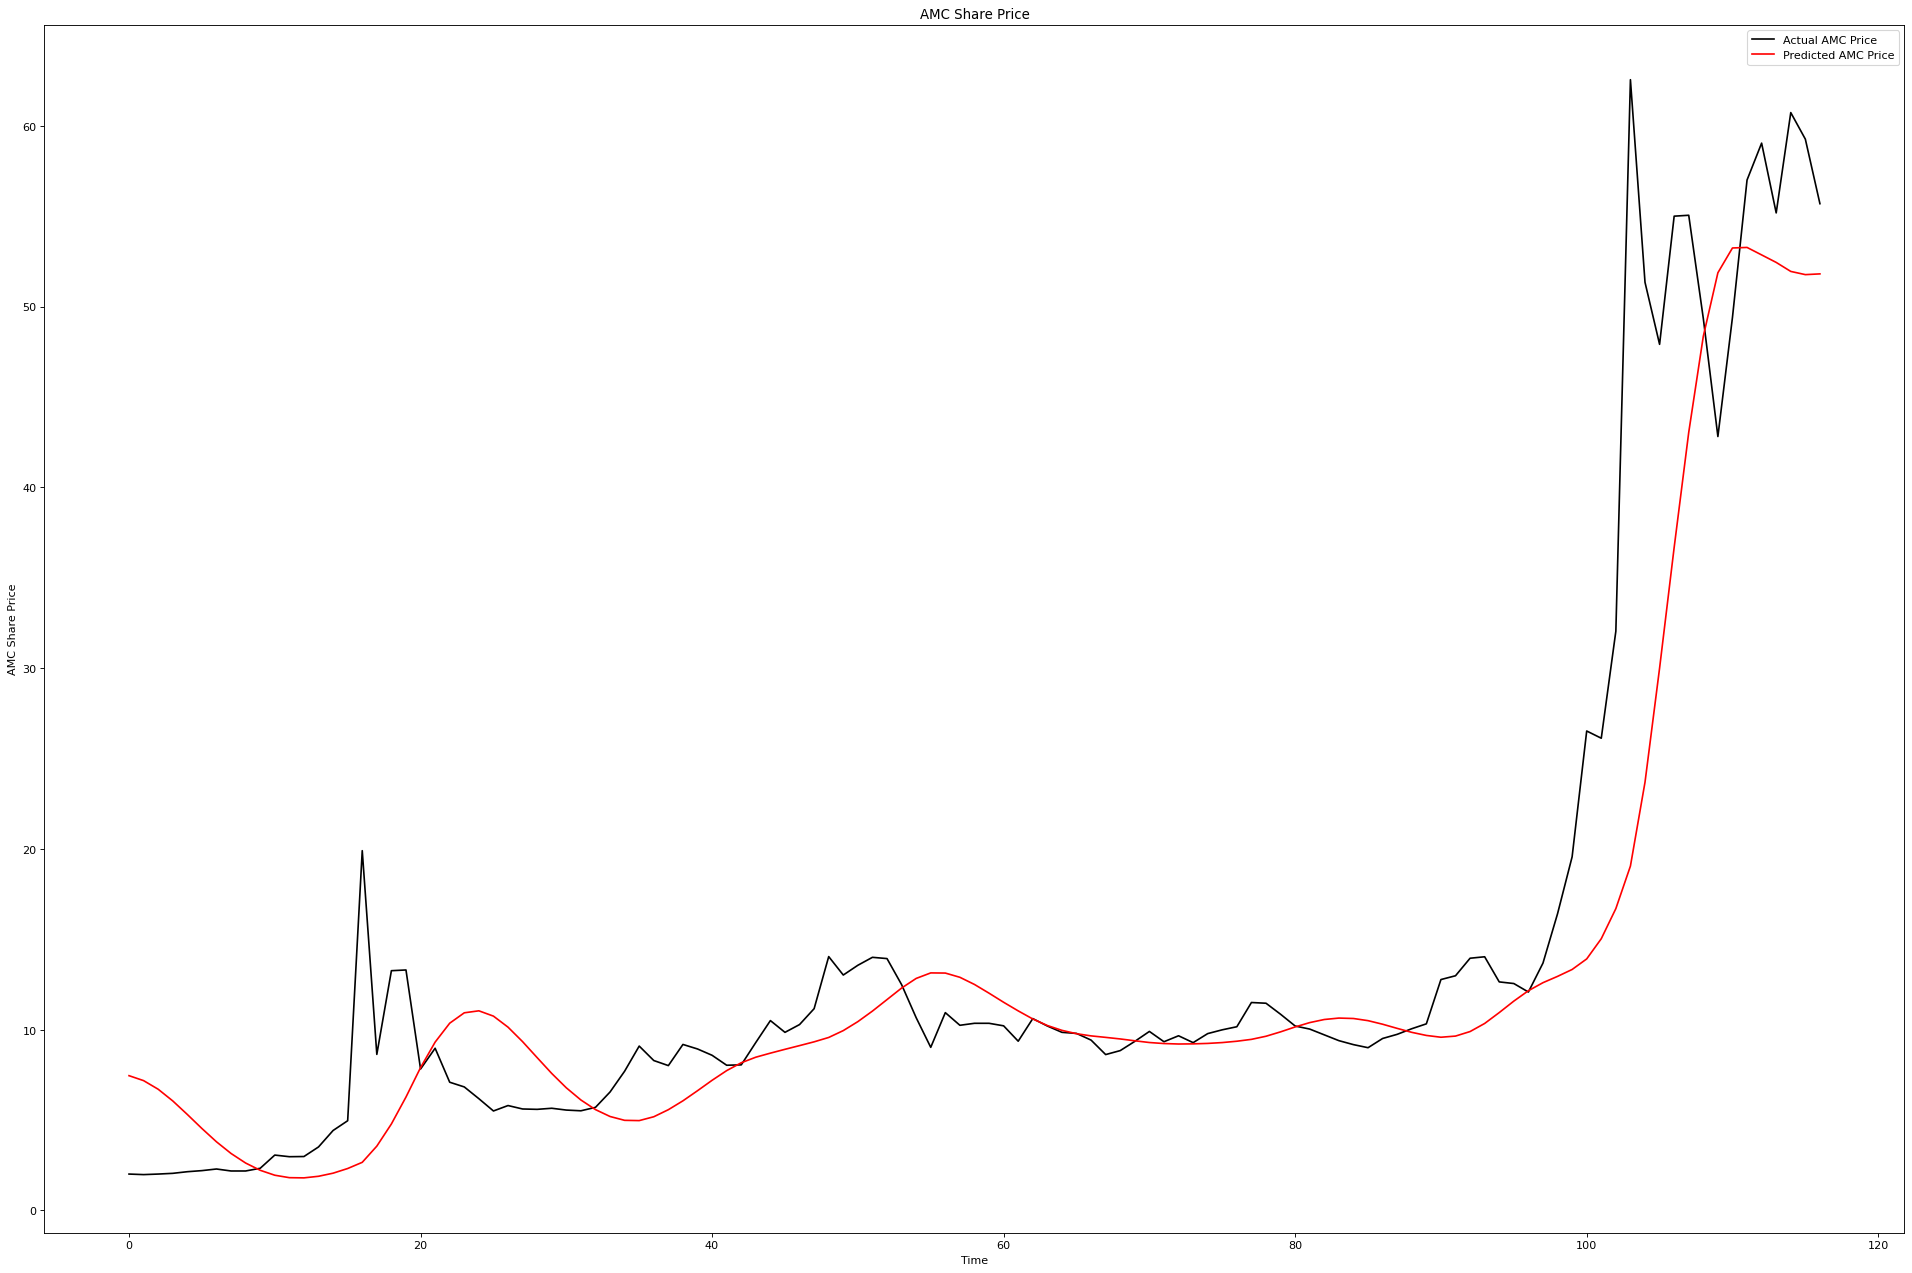

In [16]:

# Predictions on Test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform((predicted_prices))

# Plot Test Prediction
plt.figure(figsize=(30, 20), dpi=80)
plt.plot(actual_prices, color = "black", label=f'Actual {company} Price')
plt.plot(predicted_prices, color = "red", label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [28]:
df = pd.DataFrame(predicted_prices)
df.tail(-60)

,0
60,11.513050
61,11.036536
62,10.589781
63,10.227324
64,9.960144
65,9.774219
66,9.653555
67,9.571379
68,9.483979
69,9.382322


In [18]:
# Predict Next Day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')

Prediction: [[51.779747]]
